## 2. Equations in LaTeX
Type the following equations using LaTeX:

$$4.2x_1 + 10x_2 = 136$$

$$-10.1x_1 + 13.8x_2 = 132$$

$$18.3x_1 - 7.6x_2 = 108$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define line coefficients a*x + b*y = c as (a, b, c)
lines = [
    (4.2, 10, 136),
    (-10.1, 13.8, 132),
    (18.3, -7.6, 108)
]
x = np.linspace(-10, 40, 400)

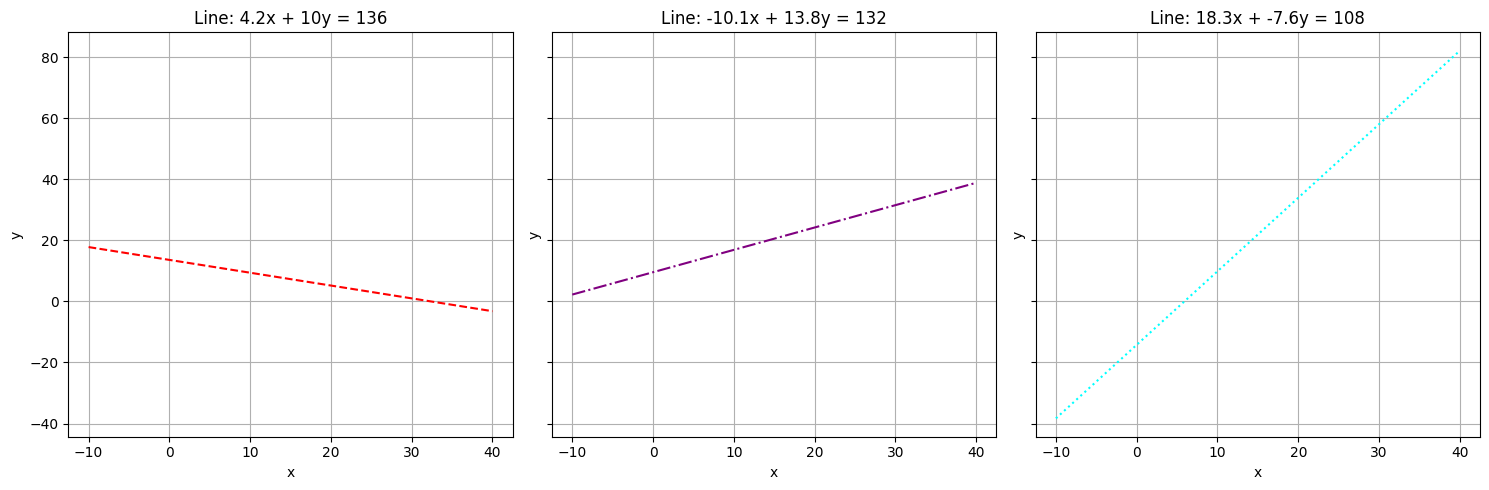

In [2]:
# 3. Plot each line on a separate graph
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
styles = ['--', '-.', ':']
colors = ['red', 'purple', 'cyan']

for ax, (coef, style, color) in zip(axes, zip(lines, styles, colors)):
    a, b, c = coef
    y = (c - a*x) / b
    ax.plot(x, y, linestyle=style, color=color)
    ax.set_title(f'Line: {a}x + {b}y = {c}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)

plt.tight_layout()
plt.show()

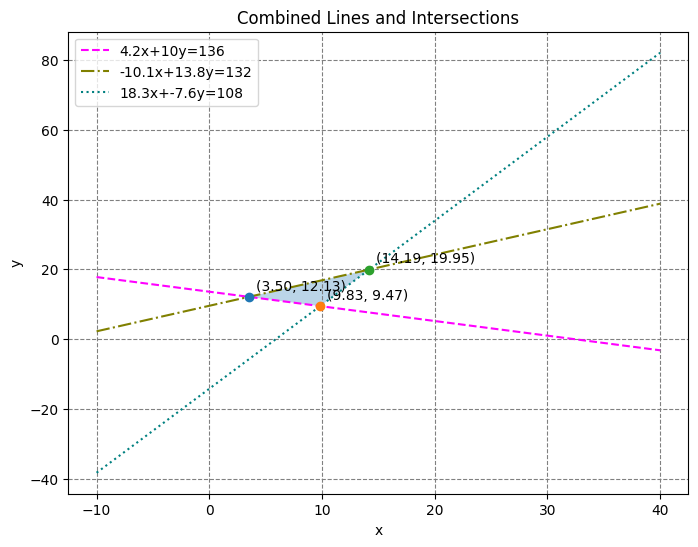

In [3]:
# 4 & 5. Combined plot, intersections, legend, grid, fill area
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
styles = ['--', '-.', ':']
colors = ['magenta', 'olive', 'teal']
labels = [f'{a}x+{b}y={c}' for a,b,c in lines]

for (a, b, c), style, color, label in zip(lines, styles, colors, labels):
    y = (c - a*x) / b
    ax.plot(x, y, linestyle=style, color=color, label=label)

# Compute and plot intersection points
intersections = []
for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        A = np.array([[lines[i][0], lines[i][1]], [lines[j][0], lines[j][1]]])
        C = np.array([lines[i][2], lines[j][2]])
        pt = np.linalg.solve(A, C)
        intersections.append(pt)
        ax.plot(pt[0], pt[1], 'o')
        ax.annotate(f'({pt[0]:.2f}, {pt[1]:.2f})', xy=(pt[0], pt[1]), textcoords='offset points', xytext=(5,5))

# Fill area formed by all three
xs = [pt[0] for pt in intersections]
ys = [pt[1] for pt in intersections]
ax.fill(xs, ys, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Combined Lines and Intersections')
ax.legend()
ax.grid(color='gray', linestyle='--')

plt.show()

In [5]:
# 6. Save the figures in different formats
fig.savefig('4.png')
fig.savefig('4.jpg')
fig.savefig('4.svg')

## 7. Conclusions on File Formats
- **PNG**: Lossless compression, handles sharp lines and text well, file size larger than JPG.
- **JPG**: Lossy compression, may introduce artifacts around lines and text, smaller file size.
- **SVG**: Vector format, scales without loss of quality, ideal for diagrams with lines and text, file is XML-based and editable.